In [308]:
import numpy as np
import pandas as pd
import os.path
import copy
import seaborn as sns

from sklearn.decomposition import NMF, LatentDirichletAllocation


In [245]:
# # gensim
# from gensim import corpora, models, similarities, matutils

# # sklearn
# from sklearn import datasets
# from sklearn.feature_extraction.text import CountVectorizer

# # logging for gensim (set to INFO)
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Set notebook options ##

In [325]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
pd.set_option('display.precision', 3)
pd.set_option('max_colwidth', 1000)

## Scrape data if not already downloaded ##

In [326]:
names = 'kim khloe kourtney kris kylie kendall cailtyn rob'.split()
filenames = ['data/' + name + '.csv' for name in names]

for idx, file in enumerate(filenames):
    if not os.path.exists('data/kim.csv'):
        print('Scraping Kim... (write scrape code)')
    else:
        name = names[idx]
        print(f'{name} is a basic bitch (already downloaded)')

kim is a basic bitch (already downloaded)
khloe is a basic bitch (already downloaded)
kourtney is a basic bitch (already downloaded)
kris is a basic bitch (already downloaded)
kylie is a basic bitch (already downloaded)
kendall is a basic bitch (already downloaded)
cailtyn is a basic bitch (already downloaded)
rob is a basic bitch (already downloaded)


## Read in and combine data ##

In [463]:
#caitlyn  = pd.read_csv('data/caitlyn.csv' , low_memory=False)
kendall  = pd.read_csv('data/kendall.csv' , low_memory=False)
kylie    = pd.read_csv('data/kylie.csv'   , low_memory=False)
kim      = pd.read_csv('data/kim.csv'     , low_memory=False)
kourtney = pd.read_csv('data/kourtney.csv', low_memory=False)
khloe    = pd.read_csv('data/khloe.csv'   , low_memory=False)
kris     = pd.read_csv('data/kris.csv'    , low_memory=False)
#rob      = pd.read_csv('data/rob.csv'     , low_memory=False)

In [464]:
#kardashians_ = pd.concat([caitlyn, kendall, kylie, kim, kourtney, khloe, kris, rob])
kardashians_ = pd.concat([kendall, kylie, kim, kourtney, khloe, kris])

In [465]:
kardashians = kardashians_[['date', 'time', 'username', 'tweet']]

In [466]:
raw_tweets = copy.deepcopy(kardashians['tweet'])
raw_tweets.head(5)

0    Can’t leave the house without my must-have skincare products! #proactiv_ambassador  http://proactv.us/NgPyPZ  pic.twitter.com/si6kAzr6qg
1                                   I’m so excited for you! ❤️#proactiv_ambassador https://twitter.com/mhabeck89/status/1143325557574295552 …
2                                                    ❤️ #proactiv_ambassador https://twitter.com/HopkinsonKellie/status/1154176575006478336 …
3                                         my @moonoralcare must-haves #moon_partner  http://bit.ly/kendall-moon-t  pic.twitter.com/UdIpCrkaFf
4     Good things come in threes ❤️  http://proactv.us/hLvNMI  #proactiv_ambassador https://twitter.com/Proactiv/status/1153318858327044096 …
Name: tweet, dtype: object

In [501]:
# Atwood
# Trump
raw_tweets = raw_tweets.append(pd.Series(["Lennie Goodings's memoir about @ViragoBooks, forthcoming from @OUP, is now called A Bite of the Apple. All an apple should be: crisp, tart but sweet, steeped in mysterious history and tangled symbolism, and not a bad missile when it comes to alleyway combat. Oh, and delicious!",
                             "The Fake News LameStream Media is doing everything possible the “create” a U.S. recession, even though the numbers & facts are working totally in the opposite direction. They would be willing to hurt many people, but that doesn’t matter to them. Our Economy is sooo strong, sorry!"]))

In [509]:
raw_tweets = raw_tweets[0]

In [510]:
raw_tweets.tail()

121391                                                                                                                                                                                                                         Diddy has a Twitterberry and Ryan has a TweetDeck..What are those??
121392                                                                                                                                                    hey Ryan Seacrest asked me yesterday if I Twitter and I said "DO I DO WHAT?!" So here I am! Come on Kourt Kim Khloe Rob...Where are you?
121393                                                                                                                                                                                       This is the first time I am twittering and its really easy! I just invited all of my kids to twitter!
121394       Lennie Goodings's memoir about @ViragoBooks, forthcoming from @OUP, is now called A Bite of the Apple. All an appl

In [507]:
raw_tweets = raw_tweets.reset_index()

In [511]:
tweets = copy.deepcopy(raw_tweets)

tweets = tweets.str.replace('[a-z]*\d+[a-z]*', '')
tweets = tweets.str.replace(r'http\S+', '')
tweets = tweets.str.replace(r'pic.twitter.*', '')
tweets = tweets.str.replace('(@[A-Za-z0-9]+)', '')
tweets = tweets.str.replace('(#[A-Za-z0-9]+)', '')
tweets = tweets.str.replace(r'[^\w\s]', '')
tweets = tweets.str.replace('\d+', '')
tweets = tweets.str.replace('(\s)_\w+', '')

tweets.head(5)

0    Cant leave the house without my musthave skincare products    
1                                           Im so excited for you  
2                                                                  
3                                                 my  musthaves    
4                                  Good things come in threes      
Name: 0, dtype: object

## Try topic modeling ##

In [512]:
# gensim
#from gensim import corpora, models, similarities, matutils

# sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


# USE TFIDF and LDA
# tweet | username | topic1 | topic2 | ... 

In [513]:
# Grab tweets (data) and corresponding usernames (targets) seperately, but PRESERVE ROW ORDER
#tweets = kardashians['tweet']
usernames = kardashians['username']

In [514]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = TfidfVectorizer(
                                   tokenizer=None,
                                   ngram_range=(1,3),
                                   stop_words=None,
                                   min_df=10,
                                   #strip_accents='unicode',
                                   #sublinear_tf=True
    
)

# count_vectorizer = CountVectorizer(
#                                    analyzer='word',
#                                    ngram_range=(1, 2),  
#                                    stop_words='english',
#                                    token_pattern="\\b[a-z][a-z]+\\b"
#                                   )

count_vectorizer.fit(tweets)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [515]:
# Split data into train set and test set

# KARDASHIAN BY TIME (RECENT / TOTAL / ETC...)

In [519]:
# Create the transposed 
doc_term = count_vectorizer.transform(tweets) # JUST TRANSFORM TWEETS FROM OTHERS
doc_term.shape

(121396, 23462)

In [520]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_term)

In [521]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
len(id2word)

23462

In [522]:
# Create LDA model (equivalent to "fit" in sklearn)

lda = LatentDirichletAllocation(n_components=20, max_iter=6, learning_method='online', learning_offset=50.,random_state=0).fit(doc_term)

#lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)

In [523]:
len(lda.components_[0])

23462

In [524]:
count_vectorizer.get_feature_names()[:6]

['__', '__rowland', '_a', '_army', '_b', '_bailon']

In [525]:
n_top_words = 10
tfidf_feature_names = count_vectorizer.get_feature_names()

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix+1)
        else:
            print("\nTopic: '", topic_names[ix], "'")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_feature_names, n_top_words)


Topic  1
love, love you, you, more, you more, love you more, too, you love, guys, you guys

Topic  2
muah, am, why thank, why thank you, tonite, baby muah, moment, lover, for this, interview

Topic  3
miss, dolls, you, miss you, dont, will, can, we, why, it

Topic  4
lol, is, the, night, so, best, me, omg, this, the best

Topic  5
to, the, my, cant, for, wait, cant wait, on, with, vote

Topic  6
yay, gorgeous, my, loves, peaches, bible, on my, bless you, app, my app

Topic  7
preach, boo, kourtney, kim, great, big, ladies, take miami, give, awwwwww

Topic  8
proud, hahahaha, proud of, so proud, so proud of, of, sister, kuwtk, of you, sunday

Topic  9
hahaha, your, stop, you, whats, know, need, loving, face, life

Topic  10
excited, at, for, the, on, so excited, our, get, my, to

Topic  11
on, tonight, coast, watch, episode, lamar, the, east, in, tune

Topic  12
fun, fab, die, much, much fun, agree, so much, quick, so much fun, so fun

Topic  13
happy, baby, birthday, happy birthday, y

In [526]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda.transform(doc_term)
lda_corpus

array([[0.01170491, 0.01170491, 0.20618008, ..., 0.08770173, 0.38805933,
        0.01170491],
       [0.01165672, 0.01165672, 0.01165672, ..., 0.01165672, 0.01165672,
        0.01165672],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       ...,
       [0.00791483, 0.00791483, 0.00791483, ..., 0.00791483, 0.1006578 ,
        0.08541678],
       [0.0073222 , 0.06316579, 0.0073222 , ..., 0.06661894, 0.0073222 ,
        0.19680794],
       [0.03213872, 0.0282394 , 0.11600626, ..., 0.00644747, 0.07343502,
        0.03214437]])

In [527]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [528]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[0]

array([0.01170491, 0.01170491, 0.20618008, 0.01170491, 0.01170491,
       0.01170491, 0.01170491, 0.01170491, 0.01170491, 0.01170491,
       0.01170491, 0.01170491, 0.13078023, 0.01170491, 0.01170491,
       0.01170491, 0.01170491, 0.08770173, 0.38805933, 0.01170491])

In [547]:
 topic_names = ['topic01', 'topic02', 'topic03', 'topic04', 'topic05', 'topic06', 'topic07', 'topic08',
                'topic09', 'topic10', 'topic11' ,'topic12' ,'topic13' ,'topic14' ,'topic15' ,'topic16',
                'topic17', 'topic18', 'topic19', 'topic20']

# topic_names = ['topic00', 'topic01', 'topic02', 'topic03', 'topic04', 'topic05', 'topic06', 'topic07',
#                'topic08', 'topic09']

# topic_names = ['topic00', 'topic01', 'topic02', 'topic03', 'topic04', 'topic05', 'topic06', 'topic07',
#                'topic08', 'topic09', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14']

topics_df = pd.DataFrame(lda_docs, columns=topic_names)

In [548]:
topics_df.shape

(121396, 20)

In [549]:
atwood_trump = topics_df.iloc[-2:,:]
topics_df = topics_df.iloc[:-2,:]

In [552]:
kardashians.shape
topics_df.shape

(121394, 20)

In [553]:
kardashians.reset_index(inplace=True, drop=True)
topics_df.reset_index(inplace=True, drop=True)

In [554]:
lda_kardash = pd.concat([kardashians, topics_df], axis=1)
lda_kardash.head(2)

,date,time,username,tweet,topic01,topic02,topic03,topic04,topic05,topic06,topic07,topic08,topic09,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20
0,2019-08-08,10:06:42,kendalljenner,Can’t leave the house without my must-have skincare products! #proactiv_ambassador http://proactv.us/NgPyPZ pic.twitter.com/si6kAzr6qg,0.012,0.012,0.206,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.131,0.012,0.012,0.012,0.012,0.088,0.388,0.012
1,2019-08-04,12:48:09,kendalljenner,I’m so excited for you! ❤️#proactiv_ambassador https://twitter.com/mhabeck89/status/1143325557574295552 …,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.779,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012


In [555]:
lda_kardash.shape

(121394, 24)

In [556]:
lda_kardash.groupby('username').mean()

,topic01,topic02,topic03,topic04,topic05,topic06,topic07,topic08,topic09,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20
username,,,,,,,,,,,,,,,,,,,,
kendalljenner,0.048,0.024,0.057,0.086,0.072,0.032,0.027,0.030,0.046,0.074,0.048,0.032,0.040,0.046,0.028,0.039,0.079,0.041,0.065,0.087
khloekardashian,0.063,0.028,0.061,0.072,0.058,0.033,0.026,0.028,0.041,0.059,0.052,0.026,0.047,0.073,0.026,0.034,0.069,0.037,0.077,0.089
kimkardashian,0.050,0.025,0.052,0.073,0.081,0.030,0.028,0.029,0.040,0.082,0.059,0.029,0.039,0.049,0.026,0.036,0.076,0.048,0.062,0.085
kourtneykardash,0.042,0.025,0.052,0.067,0.078,0.031,0.030,0.030,0.042,0.084,0.077,0.028,0.038,0.036,0.028,0.037,0.076,0.047,0.057,0.095
krisjenner,0.044,0.021,0.046,0.065,0.079,0.024,0.026,0.031,0.032,0.084,0.125,0.025,0.043,0.057,0.022,0.032,0.071,0.043,0.054,0.076
kyliejenner,0.050,0.027,0.054,0.075,0.072,0.035,0.029,0.029,0.043,0.086,0.054,0.030,0.038,0.046,0.031,0.034,0.075,0.050,0.057,0.088


## Logistic Regression ##

In [564]:
# Train-test split
lda_kardash.username[lda_kardash.username == 'krisjenner'] = 1
lda_kardash.username[lda_kardash.username == 'kyliejenner'] = 2
lda_kardash.username[lda_kardash.username == 'kendalljenner'] = 3
lda_kardash.username[lda_kardash.username == 'kimkardashian'] = 4
lda_kardash.username[lda_kardash.username == 'khloekardashian'] = 5
lda_kardash.username[lda_kardash.username == 'kourtneykardash'] = 6

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/

In [565]:
y = lda_kardash.username
X = lda_kardash.iloc[:, 4:]

In [566]:
lda_kardash.shape

(121394, 24)

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [422]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [441]:
y_train = y_train.astype('int')
y_test  = y_test.astype('int')
lr_fit = lr_model.fit(X_train, y_train)

In [448]:
y_predict = lr_model.predict(X_test)

In [456]:
y_predict

array([5, 5, 5, ..., 5, 5, 5])

In [450]:
lr_model.score(X_test, y_test)

0.4530664360146629

In [452]:
target_names = ['krisjenner', 'kyliejenner', 'kendalljenner', 'kimkardashian',
                'khloekardashian', 'kourtneykardash']

print(classification_report(y_test, y_predict, target_names=target_names))

                 precision    recall  f1-score   support

     krisjenner       0.00      0.00      0.00      1822
    kyliejenner       0.00      0.00      0.00      2053
  kendalljenner       0.00      0.00      0.00      1594
  kimkardashian       0.50      0.00      0.00      5399
khloekardashian       0.45      1.00      0.62     10999
kourtneykardash       0.00      0.00      0.00      2412

      micro avg       0.45      0.45      0.45     24279
      macro avg       0.16      0.17      0.10     24279
   weighted avg       0.32      0.45      0.28     24279



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest ##

In [568]:
# Create the model with 100 trees
rfm = RandomForestClassifier(
    n_estimators=500,
    #criterion='gini',
    #max_depth=None,
    #min_samples_split=2,
    #min_samples_leaf=1,
    #min_weight_fraction_leaf=0,
    max_features='sqrt',
    #max_leaf_nodes=None,
    #min_impurity_decrease=0,
    #min_impurity_split=1e-7,
    #bootstrap=True,
    #oob_score=False,
    #n_jobs=None,
    #random_state=None,
    #verbose=0,
    #warm_start=False,
    class_weight='balanced'
)

# Fit on training data
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [569]:
X_test

,topic01,topic02,topic03,topic04,topic05,topic06,topic07,topic08,topic09,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20
48073,0.012,0.012,0.012,0.057,0.244,0.334,0.012,0.012,0.012,0.012,0.178,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012
80962,0.015,0.015,0.015,0.015,0.015,0.322,0.015,0.015,0.015,0.155,0.015,0.015,0.267,0.015,0.015,0.015,0.015,0.015,0.015,0.015
11470,0.084,0.264,0.010,0.010,0.010,0.010,0.082,0.010,0.070,0.233,0.010,0.090,0.010,0.010,0.010,0.044,0.010,0.010,0.010,0.010
87672,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.244,0.526,0.013,0.013,0.013,0.013,0.013,0.013
20033,0.139,0.012,0.202,0.012,0.012,0.012,0.012,0.012,0.012,0.411,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.062
116967,0.242,0.008,0.008,0.008,0.399,0.008,0.008,0.008,0.008,0.170,0.008,0.008,0.008,0.008,0.008,0.008,0.057,0.008,0.008,0.008
57508,0.017,0.017,0.017,0.017,0.017,0.017,0.215,0.017,0.017,0.017,0.017,0.017,0.017,0.017,0.017,0.017,0.017,0.471,0.017,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117761,0.008,0.008,0.037,0.078,0.050,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.367,0.074,0.040,0.008,0.187,0.076,0.008,0.008
83670,0.014,0.014,0.341,0.014,0.014,0.152,0.014,0.014,0.014,0.275,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014


In [573]:
X_test.concat(atwood_trump)
X_test.tail()

AttributeError: 'DataFrame' object has no attribute 'concat'

In [574]:
# train set
train_rfm_predictions = rfm.predict(X_train)
train_rfm_probs = rfm.predict_proba(X_train)[:, 1]

# test set
y_predict = rfm.predict(X_test)
rfm_probs = rfm.predict_proba(X_test)[:, 1]

In [577]:
at_tr_predict = rfm.predict(atwood_trump)
at_tr_predict

array([5, 5])

In [575]:
target_names = ['krisjenner', 'kyliejenner', 'kendalljenner', 'kimkardashian',
                'khloekardashian', 'kourtneykardash']

print(classification_report(y_test, y_predict, target_names=target_names))

                 precision    recall  f1-score   support

     krisjenner       0.27      0.11      0.15      1822
    kyliejenner       0.21      0.21      0.21      2053
  kendalljenner       0.21      0.11      0.15      1594
  kimkardashian       0.35      0.14      0.20      5399
khloekardashian       0.50      0.81      0.62     10999
kourtneykardash       0.21      0.06      0.10      2412

      micro avg       0.44      0.44      0.44     24279
      macro avg       0.29      0.24      0.24     24279
   weighted avg       0.38      0.44      0.37     24279



## Visualize ##

In [403]:
from sklearn import manifold
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

In [361]:
topic_vectors = np.array(topics_df)
topic_vectors

array([[0.184383  , 0.02928128, 0.02928128, ..., 0.13299893, 0.33593639,
        0.17099202],
       [0.03716068, 0.03716049, 0.03716177, ..., 0.03716287, 0.03716095,
        0.03716084],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.31562109, 0.04146975, 0.04146975, ..., 0.3526209 , 0.04146975,
        0.04146975],
       [0.09393234, 0.02152065, 0.02152088, ..., 0.26629844, 0.1500689 ,
        0.02152712],
       [0.02686998, 0.14090944, 0.02686998, ..., 0.25439482, 0.18826886,
        0.02688295]])

In [322]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

In [317]:
tsne_lda = tsne_model.fit_transform(topic_vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 121394 samples in 0.626s...
[t-SNE] Computed neighbors for 121394 samples in 533.701s...
[t-SNE] Computed conditional probabilities for sample 1000 / 121394
[t-SNE] Computed conditional probabilities for sample 2000 / 121394
[t-SNE] Computed conditional probabilities for sample 3000 / 121394
[t-SNE] Computed conditional probabilities for sample 4000 / 121394
[t-SNE] Computed conditional probabilities for sample 5000 / 121394
[t-SNE] Computed conditional probabilities for sample 6000 / 121394
[t-SNE] Computed conditional probabilities for sample 7000 / 121394
[t-SNE] Computed conditional probabilities for sample 8000 / 121394
[t-SNE] Computed conditional probabilities for sample 9000 / 121394
[t-SNE] Computed conditional probabilities for sample 10000 / 121394
[t-SNE] Computed conditional probabilities for sample 11000 / 121394
[t-SNE] Computed conditional probabilities for sample 12000 / 121394
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 121000 / 121394
[t-SNE] Computed conditional probabilities for sample 121394 / 121394
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.003845
[t-SNE] KL divergence after 1000 iterations: 3.337443


In [323]:
n_top_words = 5

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [324]:
_lda_keys = []
for i in xrange(topic_vectors.shape[0]):
  _lda_keys +=  _topics[i].argmax(),

NameError: name 'xrange' is not defined

In [305]:
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(topic_vectors)

word_indices = set()

key_words = ['sweet', 'proud', 'baby', 'khloe', 'thanks', 'yes', 'today', 'miss', 'good',
             'know', 'thank', 'fun', 'dolls', 'amazing', 'love', 'hi', 'muah', 'true', 'wow', 'yay']

In [306]:
#key_words = ["monster", "margaret", "elizabeth", "victor", "robert", "frankenstein", "henry", "justine", "beaufort", "caroline", "william"]
for key in key_words:
    word_index = count_vectorizer.vocabulary_[key]
    dist, index = nn.kneighbors(topic_vectors[[word_index], :], n_neighbors=10)
    word_indices.add(word_index)
    word_indices.update(list(index.flat))
    
word_indices = list(word_indices)


target_vecs = topic_vectors[word_indices,:]

AttributeError: module 'seaborn' has no attribute 'annotate'

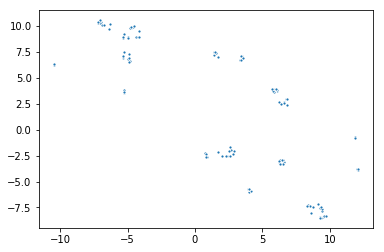

In [314]:
#figsize(10,10)

vecs_emb = manifold.TSNE( metric="cosine", n_iter=3000).fit_transform(target_vecs)

sns.scatterplot(x=vecs_emb[:,0], y=vecs_emb[:,1],marker='.' )
for i, row in enumerate(vecs_emb):
    word_i = word_indices[i]
    word = count_vectorizer.get_feature_names()[word_i]
    if word in key_words:
        annotate(word, row, color="red", bbox=dict(boxstyle="round", fc="w", ec="k", alpha=.5), zorder=10)
    else:
        annotate(word, row, bbox=dict(boxstyle="round", fc="w", ec="k", alpha=.5), zorder=-1)